# Assignment P4 - Final assignment 
## THNHAN002
______________________________________________________________________________________________________


## Import all necessary packages 

In [108]:
# Important packages 
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LogNorm
import numpy as np

## 1. Introduction to the bathymetry of the West Coast of South Africa

### Load GMRT Synthesis grid file as xarray dataset

In [111]:
# Load GMRT Synthesis grid file as xarray DataSet
bathy = xr.open_dataset("GMRTv4_3_0_20250325topo.grd")
print(bathy)

<xarray.Dataset>
Dimensions:   (lon: 2241, lat: 2593)
Coordinates:
  * lon       (lon) float64 10.15 10.15 10.16 10.16 ... 19.98 19.99 19.99 20.0
  * lat       (lat) float64 -34.94 -34.94 -34.93 -34.93 ... -25.1 -25.1 -25.09
Data variables:
    altitude  (lat, lon) float64 ...
Attributes:
    title:        GMRT Grid
    history:      Projection: Cylindrical Equidistant\nExtracted from the Glo...
    Conventions:  COARDS,CF-1.6
    GMT_version:  4.5.7


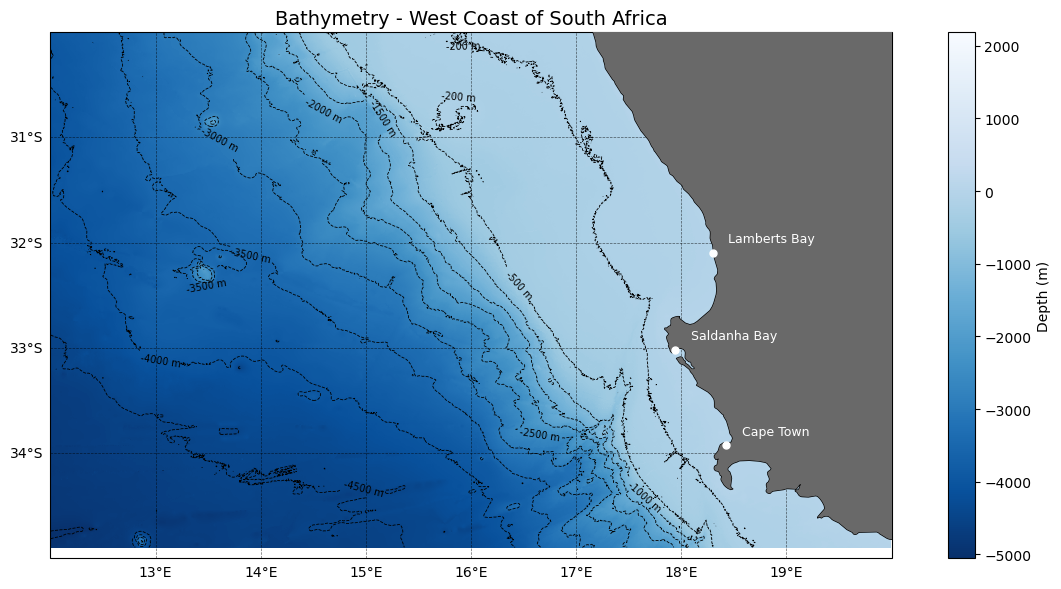

In [112]:
# Code for Figure 1 

# Crop dataset to region of interest
cropped = bathy.sel(lat=slice(-34.9, -30.0), lon=slice(12, 20))

# Mask invalid NaN values
masked_bathy = np.ma.masked_invalid(cropped["altitude"])

# Define figure & map extent
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([12, 20, -35, -30], crs=ccrs.PlateCarree()) 

# Plot bathymetry with cropped colormap 
bathy_plot = ax.pcolormesh(
    cropped["lon"], cropped["lat"], masked_bathy,
    cmap="Blues_r", shading="auto", transform=ccrs.PlateCarree()
)

# Add bathymetry contour lines to the map 
contour_levels = [-5000, -4500, -4000, -3500, -3000, -2500, -2000, -1500, -1000, -500, -200]
contours = ax.contour(
    cropped["lon"], cropped["lat"], masked_bathy,
    levels=contour_levels, colors='black', linewidths=0.6,
    transform=ccrs.PlateCarree()
)
ax.clabel(contours, inline=True, fontsize=7, fmt='%d m')

# Land color
ax.add_feature(cfeature.LAND, facecolor="dimgray", zorder=5)
ax.coastlines(resolution="10m")

# Citiy labels 
cities = {
    "Cape Town": (-33.9249, 18.4241),
    "Saldanha Bay": (-33.0182, 17.9390),
    "Lamberts Bay": (-32.0948, 18.2987)
}

for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker='o', color='white', markersize=5,
            transform=ccrs.PlateCarree(), zorder=6)
    ax.text(
        lon + 0.15, lat + 0.1, city,
        fontsize=9, color='white',
        transform=ccrs.PlateCarree(), zorder=7
    )

# Gridlines 
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='black', alpha=0.6, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {"size": 10}
gl.ylabel_style = {"size": 10}

# Title & colorbar
ax.set_title("Bathymetry - West Coast of South Africa", fontsize=14)
plt.colorbar(bathy_plot, ax=ax, label="Depth (m)")
plt.tight_layout()

# Show plot
plt.show()

### Description for Figure 1

**Projection used:** PlateCarree

Figure 1 shows a bathymetric map of the West Coast of South Africa, which displays ocean depth contours and seafloor topography that is derived from the Global Multi-Resolution Topography (GMRT) Synthesis tool. The colour gradient ranges from light blue in shallower coastal waters to dark blue in deeper offshore regions. Bathymetric contour lines reveal the structure of the continental shelf, which extends westwards from the coastline before dropping off steeply along the continental slope. The shelf region plays a key role in coastal upwelling and productivity. The landmass, which is shaded in dark grey, shows coastal towns, such as Cape Town, Saldanha Bay, and Lamberts Bay (marked with white dots and labels) to provide spatial reference points. Gridlines indicate latitude and longitude for geographic reference.  

## 2. Climatological annual mean chlorophyll-a concentration along the West Coast of South Africa from 1998 to 2020

### Load chlorophyll dataset as xarray

In [116]:
chl_path = "/Users/heiketihen/THNHAN002-SCDM2025/P4/ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHLY_4km_PML_CHL-fv5.0.nc"
chl = xr.open_dataset(chl_path)
print(chl) 

<xarray.Dataset>
Dimensions:  (time: 12, lon: 8640, lat: 4320)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 1997-12-01
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
Data variables:
    crs      int32 ...
    chlor_a  (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                               Climate Data Interface version ?? (htt...
    history:                           Tue Apr 27 20:27:21 2021: cdo selvar,c...
    source:                            NASA SeaWiFS  L1A and L2 R2018.0 LAC a...
    institution:                       Plymouth Marine Laboratory
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    ...                                ...
    time_coverage_start:               199801010000Z
    time_coverage_end:                 202001312359Z
    id:            

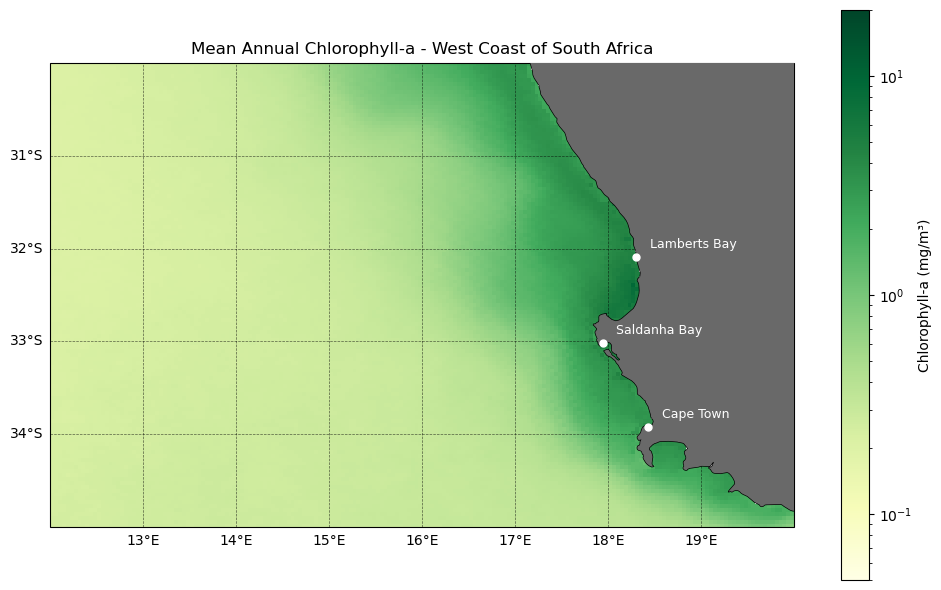

In [117]:
#Code for Figure 2

# Subset West Coast of South Africa
chl_var = "chlor_a"  
chl_subset = chl[chl_var].sel(
    lat=slice(-30, -35),  
    lon=slice(12, 20)
)

# Mean annual chlorophyll
chl_mean = chl_subset.mean(dim="time")

# Plot chlorophyll map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot using a log scale
chl_plot = ax.pcolormesh(
    chl_subset["lon"], chl_subset["lat"], chl_mean,
    norm=LogNorm(vmin=0.05, vmax=20), cmap="YlGn",
    shading="auto", transform=ccrs.PlateCarree()
)

# Map features
ax.coastlines(resolution="10m")
ax.add_feature(cfeature.LAND, facecolor="dimgray", zorder=5)
ax.set_title("Mean Annual Chlorophyll-a - West Coast of South Africa")  

# City markers 
cities = {
    "Cape Town": (-33.9249, 18.4241),
    "Saldanha Bay": (-33.0182, 17.9390),
    "Lamberts Bay": (-32.0948, 18.2987)
}

for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker='o', color='white', markersize=5,
            transform=ccrs.PlateCarree(), zorder=6)
    ax.text(
        lon + 0.15, lat + 0.1, city,
        fontsize=9, fontweight='normal', color='white',
        transform=ccrs.PlateCarree(), zorder=7,
       
    )

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='black', alpha=0.6, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Adjustments
plt.colorbar(chl_plot, ax=ax, label="Chlorophyll-a (mg/m³)")
plt.tight_layout()
plt.show()

### Description for Figure 2

**Projection used:** PlateCarree

Figure 2 shows the climatological mean annual chlorophyll-a concentration along the chosen part of the West Coast of South Africa, based on satellite-derived data from the ESA OC-CCI dataset. As previously mentioned, the chlorophyll-a concentration is used as a proxy for phytoplankton biomass, with higher values typically associated with regions of high biological productivity. 
A clear gradient is visible in the figure, with the concentration of chlorophyll being highest near the coast, which can be explained by coastal upwelling. The Benguela Upwelling system is one of the most productive marine ecosystems in the world due to the continuous upwelling of cold, nutrient-rich water from the deep water masses. Driven by strong southeasterly trade winds, this process brings nutrients to the surface, which fuels high phytoplankton growth, supporting high marine biodiversity and productivity along the West Coast of South Africa. The color scale is plotted on a logarithmic scale to capture the wide range of concentrations, from oligotrophic offshore waters to nutrient-rich nearshore zones, and the locations of Cape Town, Saldanha Bay, and Lamberts Bay are marked for spatial reference. 

## 3. Climatological monthly mean log chlorophyll-a concentration along the West Coast of South Africa from 1998 to 2020

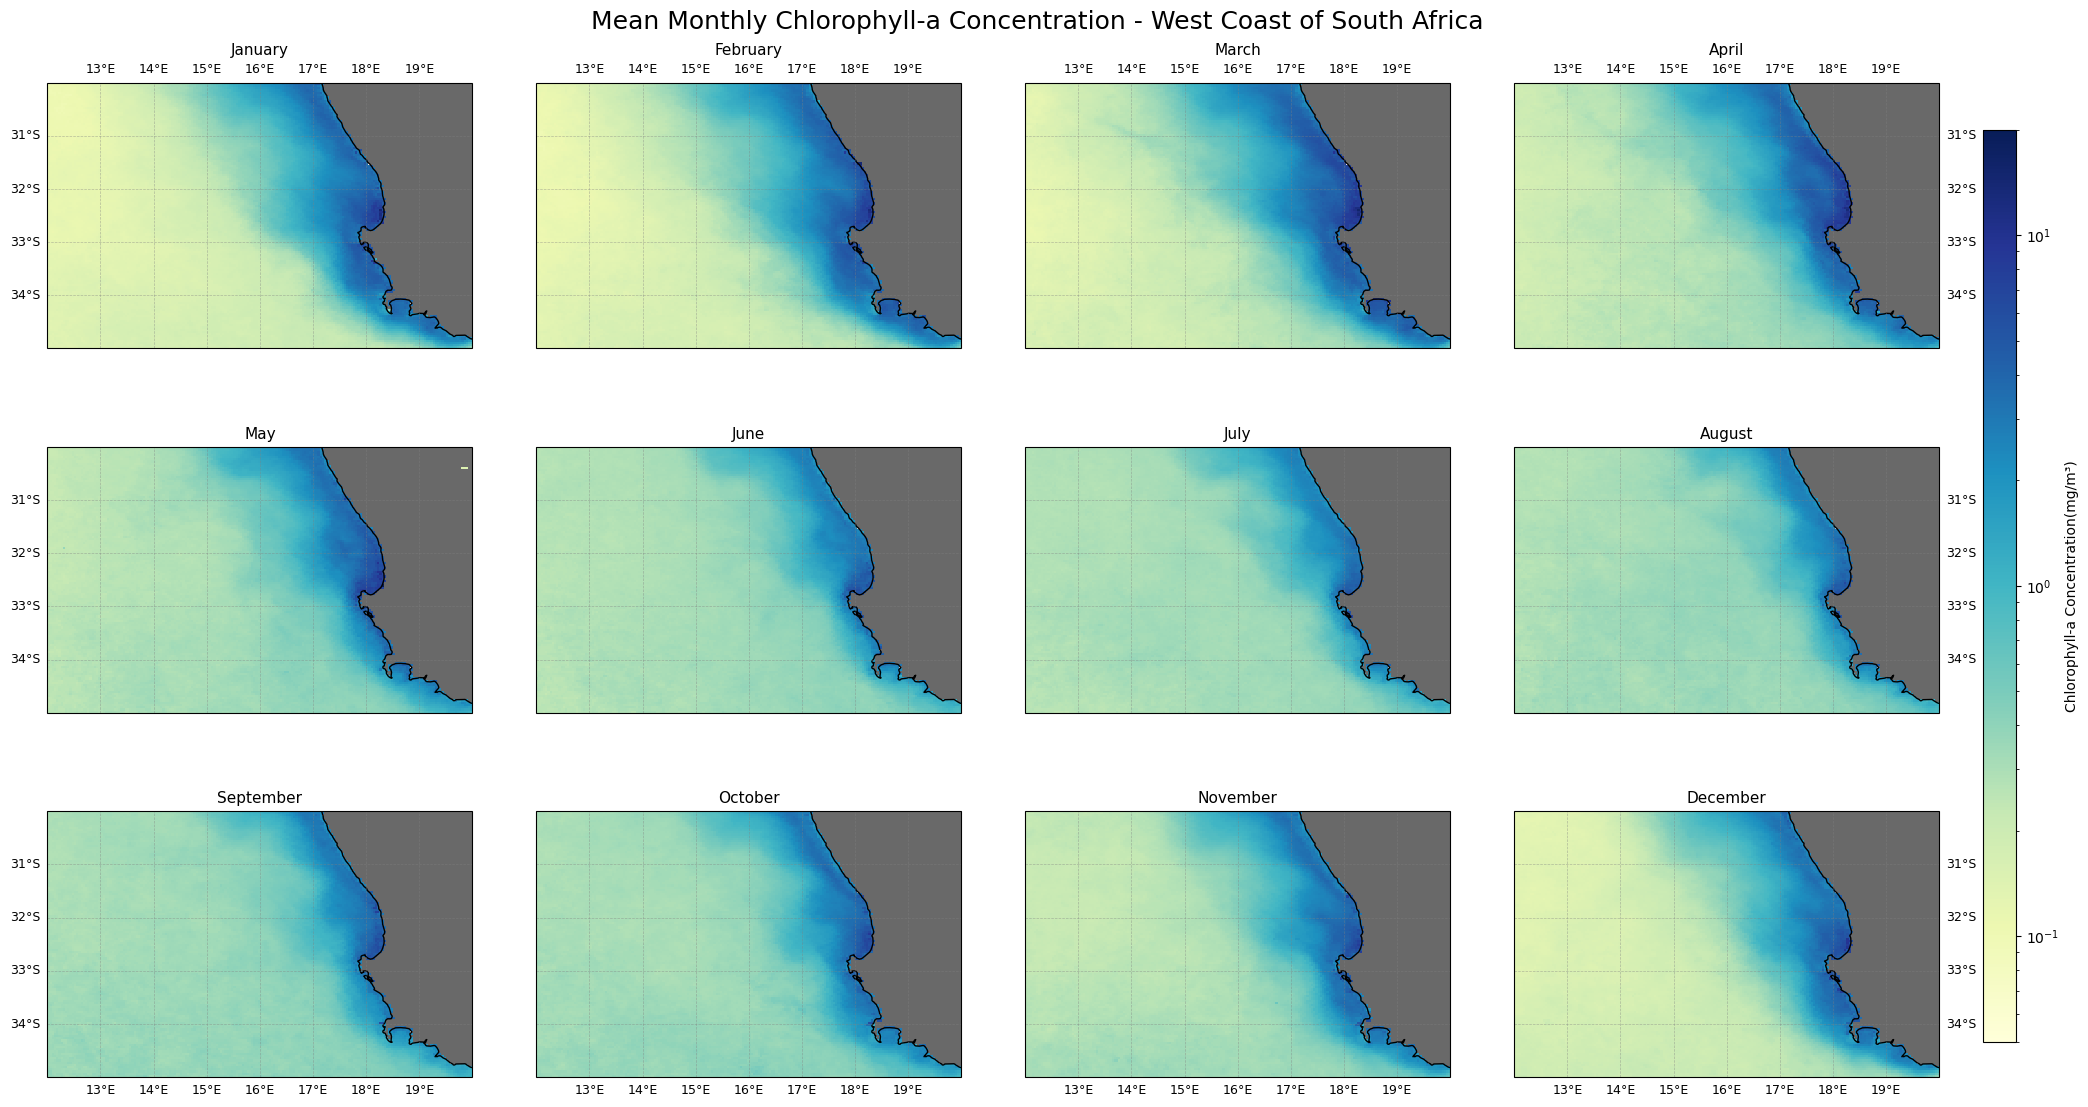

In [137]:
# Code for Figure 3

# Load dataset
chl_path = "/Users/heiketihen/THNHAN002-SCDM2025/P4/ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHLY_4km_PML_CHL-fv5.0.nc"
chl = xr.open_dataset(chl_path)
chl_var = "chlor_a"

# Subset to region
chl_months = chl[chl_var].sel(lat=slice(-30, -35), lon=slice(12, 20))

# Month labels
month_names = ["January", "February", "March", "April",
               "May", "June", "July", "August",
               "September", "October", "November", "December"]

# Figure & axes
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(22, 12),
                         subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

# Plot each month
for i, ax in enumerate(axes):
    chl_month = chl_months.isel(time=i)
    plot = ax.pcolormesh(
        chl_month["lon"], chl_month["lat"], chl_month,
        cmap="YlGnBu", norm=LogNorm(vmin=0.05, vmax=20),
        shading="auto", transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="10m")
    ax.add_feature(cfeature.LAND, facecolor="dimgray")
    ax.set_extent([12, 20, -35, -30])
    ax.set_title(month_names[i], fontsize=11)

    # Gridlines (outer plots only)
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.left_labels = i % 4 == 0
    gl.right_labels = i % 4 == 3
    gl.bottom_labels = i >= 8
    gl.top_labels = i < 4
    gl.xlabel_style = {"size": 9}
    gl.ylabel_style = {"size": 9}

# Colorbar
cbar_ax = fig.add_axes([0.93, 0.12, 0.015, 0.76])
cbar = fig.colorbar(plot, cax=cbar_ax)
cbar.set_label("Chlorophyll-a Concentration(mg/m³)")

# Title & layout
plt.suptitle("Mean Monthly Chlorophyll-a Concentration - West Coast of South Africa", fontsize=18)
plt.subplots_adjust(left=0.05, right=0.91, top=0.93, bottom=0.08, wspace=0.15, hspace=0.25)
plt.show()


### Description for Figure 3

**Projection used:** PlateCarree

Figure 3 presents 12 maps of the monthly climatological mean chlorophyll-a concentrations (mg/m³) along the West Coast of South Africa. Every panel shows a different month (January-December), which allows for a visual comparison of seasonal trends throughout the year. The landmass is shaded in dark grey for contrast, and a logarithmic color scale (YlGnBu) is used to capture the wide range of chlorophyll values. Clear seasonal patterns in changing chlorophyll-a concentrations can be seen across the 12 maps. The chlorophyll concentration peaks during spring to late summer (September to March), particularly in October and February, while a notable decline in chlorophyll can be observed during the winter months (especially between May and July). The highest values always appear close to shore due to the previously mentioned strong influence of the dynamics of the Benguela upwelling system along the West Coast of South Africa. The higher chlorophyll levels during the summer months correlate with the enhanced upwelling due to strong south-easterly trade winds, which drive surface waters offshore and promote the vertical transport of cold, nutrient-rich water to the surface. Increased UV radiation and higher nutrient levels during the summer promote phytoplankton blooms, resulting in increased chlorophyll-a levels. When upwelling weakens in winter, wind activity and mixing are reduced, which limits nutrient availability and leads to the observed lower phytoplankton biomass and, thus, lower chlorophyll-a concentrations. However, the Benguela Upwelling System is productive throughout the year, due to storm-induced mixing and weaker thermoclines in winter still pushing nutrients into surface waters.

## 4. Seasonal Chlorophyll Time Series: Regional Mean vs. High-Productivity Grid Point

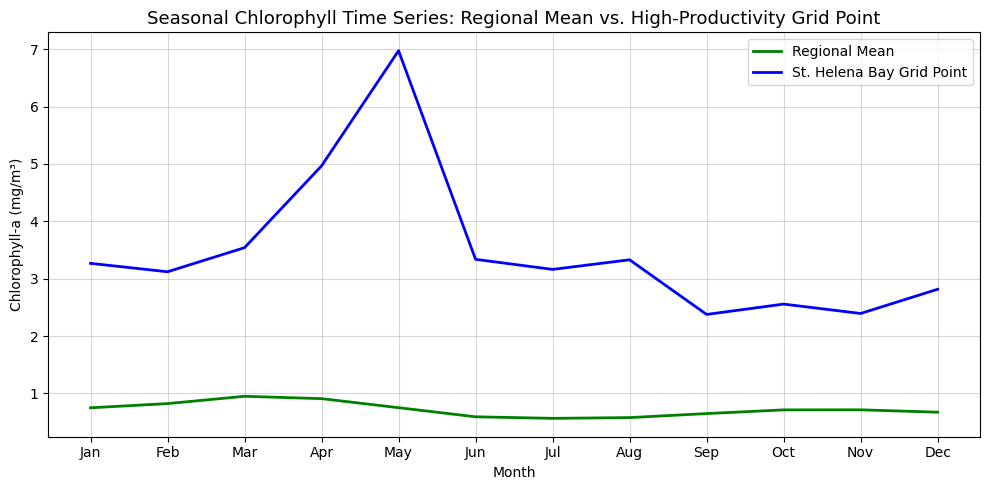

In [163]:
# Load the dataset
chl_path = "/Users/heiketihen/THNHAN002-SCDM2025/P4/ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHLY_4km_PML_CHL-fv5.0.nc"
chl = xr.open_dataset(chl_path)
chl_var = "chlor_a"

# Region of interest
chl_subset = chl[chl_var].sel(
    lat=slice(-30, -35),
    lon=slice(12, 20)
) 

# Compute regional monthly mean 
regional_mean = chl_subset.mean(dim=["lat", "lon"])

# Single high-chlorophyll grid point (St. Helena Bay)
point_timeseries = chl[chl_var].sel(
    lat=-32.8, lon=17.9, method="nearest"
)

# Plot time series
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.figure(figsize=(10, 5))
plt.plot(months, regional_mean, label="Regional Mean", color="green", linewidth=2)
plt.plot(months, point_timeseries, label="St. Helena Bay Grid Point", color="blue", linewidth=2)

# Customisation 
plt.title("Seasonal Chlorophyll Time Series: Regional Mean vs. High-Productivity Grid Point", fontsize=13)
plt.ylabel("Chlorophyll-a (mg/m³)")
plt.xlabel("Month")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

### Description for Figure 4

Figure 6 displays a time series comparison of climatological monthly chlorophyll-a concentrations (mg/m³) averaged over the entire selected region along the West Coast of South Africa (green line) and at a single high-productivity grid point near St. Helena Bay (blue line). While the x-axis represents the months of the year, the y-axis shows chlorophyll concentration on a linear scale. The time series shows the seasonal variability in phytoplankton productivity, especially in regions influenced by coastal upwelling. When comparing the regional mean chlorophyll-a concentration and the St. Helena Bay grid point, it can be seen that the chosen grid point shows a much higher variability and peak concentrations, particularly from March to May (values reach nearly 7mg/m³), while regional mean remains relatively stable throughout the year, with slight increases in late summer and spring (March-April and October-November). The seasonal peak at the St. Helena Bay grid point reflects intense upwelling conditions and nutrient enrichment that drive the phytoplankton blooms in this specific area. A general productivity trend for the broader coastal ecosystem is reflected in the regional mean. I chose St. Helena Bay as the grid point of interest because the area is well-known for its primary productivity in the southern Benguela upwelling system. The high productivity, which can be explained by the consistent wind-driven upwelling in the area, makes it a very important hotspot for fisheries, communities, and marine biodiversity. 